# The Perceptron Learning Algorithm 

This notebook will first build the perceptron, which is one of the earliest nueural network architecturs, and implement it with the [Irisdataset](Dataset/IRIS.csv) dataset. 

In [7]:
#import required packages
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Sklearn imports
from sklearn import datasets 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report #for nice result formatting

In [23]:
# Load the Iris dataset
iris = datasets.load_iris()
print(iris['DESCR'])

# Use all available features
x = iris.data
y = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [24]:
# Split the data into training and test sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.3, random_state=0)

In [25]:
# Standardize the data
sc = StandardScaler()
X_Train_std = sc.fit_transform(X_Train)
X_Test_std = sc.transform(X_Test)

In [26]:
# Set up grid search for hyperparameter tuning
param_grid = {
    'eta0': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000, 1500],
    'tol': [0.001, 0.0001]
}

In [27]:
perceptron = Perceptron(random_state=0)
grid_search = GridSearchCV(perceptron, param_grid, cv=5, n_jobs=-1, scoring='accuracy')


In [28]:
# Fit the model with the grid search
grid_search.fit(X_Train_std, Y_Train)

# Get the best parameters and retrain with them
best_params = grid_search.best_params_
best_perceptron = Perceptron(**best_params, random_state=0)
best_perceptron.fit(X_Train_std, Y_Train)

Perceptron(eta0=0.01, max_iter=500, tol=0.0001)

In [29]:
# Make predictions with the optimized model
Y_Pred = best_perceptron.predict(X_Test_std)
print(Y_Test == Y_Pred)

[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True]


In [30]:
# Calculate the accuracy
accuracy = accuracy_score(Y_Test, Y_Pred)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9555555555555556


In [31]:
# Output the results
print("Best hyperparameters:", best_params)
print(f"Total incorrect predictions out of {len(Y_Test)}: {(Y_Test != Y_Pred).sum()}")
print(f"Percentage accuracy: {accuracy * 100:.2f}%")

Best hyperparameters: {'eta0': 0.01, 'max_iter': 500, 'tol': 0.0001}
Total incorrect predictions out of 45: 2
Percentage accuracy: 95.56%


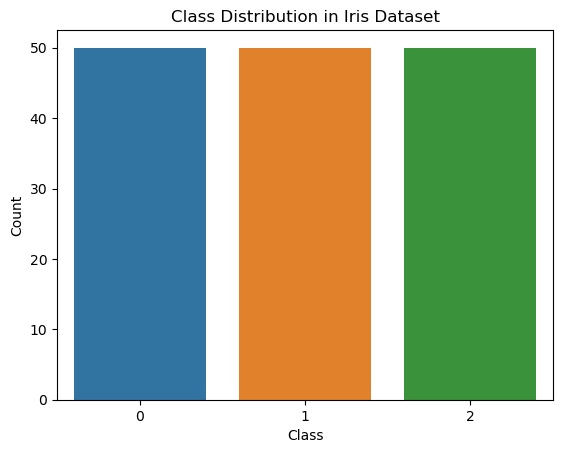

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

# Create a bar plot for class distribution
sns.countplot(x=iris.target)
plt.title("Class Distribution in Iris Dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


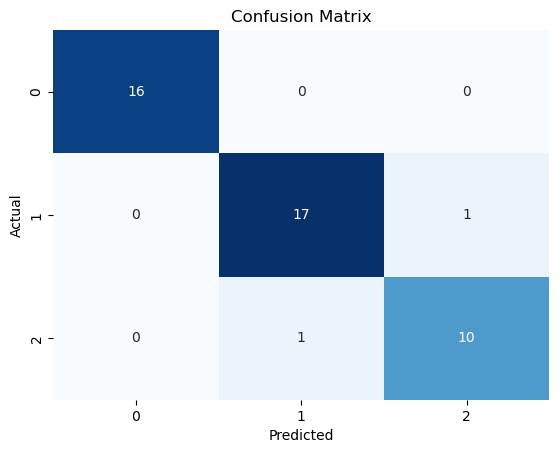

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(Y_Test, Y_Pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [34]:
#Print a nicely formatted report
classify_perceptron = classification_report(Y_Test, Y_Pred)
print("\nClassification Report")
print(classify_perceptron)


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



The Perceptron Learning Algorithm is only accurate when the data is linearly separable. Thus, while it is not a good fit for this [Iris](/Dataset/IRIS.csv) dataset, the Perceptron's low computational overhead makes it ideal for small, quick and linearly separable data.